# Instruction 
## Release Notes
First release of the the MLP_Fuelmap_SingleMap 2/14/2023 by wto@csustan.edu

### To train and predict the ML 
1. Load the Libraries from Fuelmap.ipynb first using %run Fuelmap.ipynb
2. Run the Train and Predict block. It will train the MLP with all of the non-zero tag data. Create the confusion matrix and print out the accuracies.

### To predict the fuelmap without training
1. Load the Libraries from Fuelmap.ipynb first using %run Fuelmap.ipynb
2. Run the Prediction Only Cell. This will run the prediction with the previously trained mlp. Create the confusion matrix and print out the accuracies.


In [2]:
# Load Libraries
%run Fuelmap.ipynb
## Defining cut parameters
RMSD_CUT = 12 #15.472021

Loaded LoadTrainingData()
Loaded Load2TrainingData()
Loaded RMS_of_band5x5()
Loaded PrintAcc()
Loaded SavePredictTif()


loading the data
houses tagged  1418
roads tagged  3403
asphalts tagged  2964
greentree tagged  17906
dead trees tagged  8112
green grass tagged  4513
dry grass tagged  9572
water tagged  2549
rocks tagged  6568
running mlp.fit
Running mlp.predict
Running RMSD Analysis
Making the cut on RMSD
Creating the Confusion Matrix


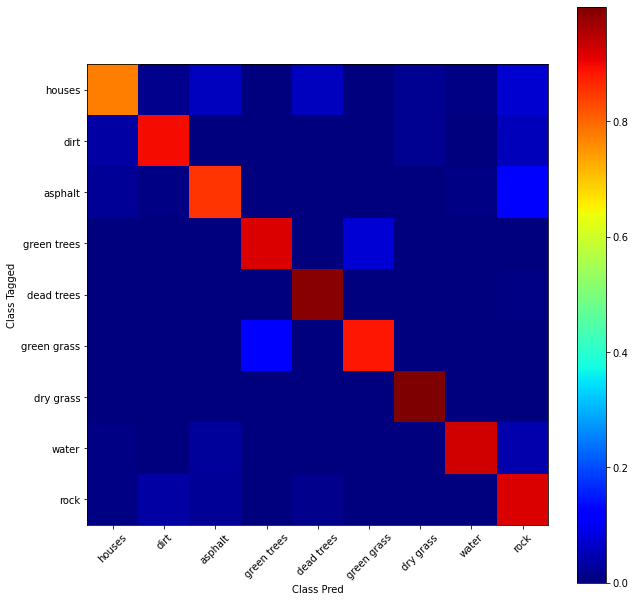

House Accuracy : 0.7729196050775741
Dirt Accuracy : 0.8947987070232148
Asphalt Accuracy : 0.8508771929824561
GreenTree Accuracy : 0.9209762090919245
DeadTree Accuracy : 0.9902613412228797
GreenGrass Accuracy : 0.8821183248393529
DryGrass Accuracy : 0.9990597576264104
Water Accuracy : 0.9274225186347588
Rock Accuracy : 0.9208282582216809
Overall Accuracy 0.9322515568809754
Unburnable Accuracy 0.9824872796118802
Burnable Accuracy 0.9985038525796075
Saving as tif raster file
this took  621.334413766861 seconds


In [5]:
################### Training and Predict #########################################################
################### This block runs the Training (mlp.fit) then predict the classes for the entire map (mlp.predict)
################### Then Run the RMSD Analysis to differentiate Green Trees vs Grass #############################
start = time.time()

### Define your Input and Output Files
imageFile='../AerialImages/hxip_m_3711954_sw_11_100.tif'
tagFile='hxip_m_3711954_sw_11_100_agfeb11.tif'
#tagFile='hxip_m_3711954_sw_11_100_nov29_ag.tif'
outFile='hxip_m_3711954_sw_11_100_NNRMSD.tif'

print("loading the data")
X_train, X_test, Y_train, Y_test, X_matrix, X_flat, Y_matrix, Y_flat = LoadTrainingData( imageFile,tagFile )

mlp = MLPClassifier(solver = 'sgd', learning_rate_init= 0.01, activation = 'relu', 
                    random_state = True, hidden_layer_sizes = [15,15,15,15])


print("running mlp.fit")
#print("Y_flat[Y_flat!=0].shape",Y_flat[Y_flat!=0].shape)
#Make a copy of Y_flat where 6 is retagged to 4.
Y_flat_64 = np.copy(Y_flat)
Y_flat_64[Y_flat_64==6]=4

mlp.fit(X_flat[Y_flat!=0],Y_flat_64[Y_flat_64!=0])
#print("Training Score %: ", mlp.score(X_train, Y_train)*100)
#print("Test Score %: ", mlp.score(X_test, Y_test)*100)

print("Running mlp.predict")
Y_predict = mlp.predict(X_flat)

print("Running RMSD Analysis")
Y_predict_matrix = np.reshape(Y_predict, X_matrix[0].shape)
NIR_RMS = RMSD_of_band5x5(X_matrix[3], Y_predict_matrix)

NIR_RMS_f = NIR_RMS.flatten()

print("Making the cut on RMSD")
for i in range(len(NIR_RMS_f)):
    if ( NIR_RMS_f[i]<RMSD_CUT and Y_predict[i]==4 ):
        Y_predict[i]=6

############ Confusion Matrix Test###########
print("Creating the Confusion Matrix")
cm = metrics.confusion_matrix(Y_flat[Y_flat!=0],Y_predict[Y_flat!=0])

cm_norm = []
for i in range(len(cm)):
    row = cm[i]/np.sum(cm[i])
    cm_norm.append(row)
cm_norm= np.array(cm_norm)    

fulltargets =['houses', 'dirt', 'asphalt', 'green trees', 'dead trees', 'green grass','dry grass', 'water','rock']

fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.imshow(cm_norm,cmap='jet',extent=[0.5,9.5,0.5,9.5])
plt.colorbar()

plt.xlabel("Class Pred")
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(fulltargets)
plt.xticks(rotation = 45)
plt.ylabel("Class Tagged")
ax.set_yticks([1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(fulltargets[::-1])
plt.show()
############ End Confusion Matrix Test###########

PrintAcc(Y_predict,Y_flat)
SavePredictTif(Y_predict,imageFile,outFile)
print('this took ', time.time()-start, 'seconds')

loading the data #tagFile='hxip_m_3711954_sw_11_100_nov29_ag.tif'
houses tagged  1778
roads tagged  3038
asphalts tagged  3002
greentree tagged  5581
dead trees tagged  4659
green grass tagged  2109
dry grass tagged  8933
water tagged  2833
rocks tagged  7761
running mlp.fit
Running mlp.predict
Running RMSD Analysis
Making the cut on RMSD
Creating the Confusion Matrix
House Accuracy : 0.81214848143982
Dirt Accuracy : 0.9904542462146149
Asphalt Accuracy : 0.8287808127914723
GreenTree Accuracy : 0.8917756674431105
DeadTree Accuracy : 0.9890534449452673
GreenGrass Accuracy : 0.8866761498340445
DryGrass Accuracy : 0.987350274263965
Water Accuracy : 0.9887045534768797
Rock Accuracy : 0.9183094961989434
Overall Accuracy 0.9357585529299138
Unburnable Accuracy 0.9975016293721486
Burnable Accuracy 0.9923409453998684
Saving as tif raster file
this took  508.15949535369873 seconds
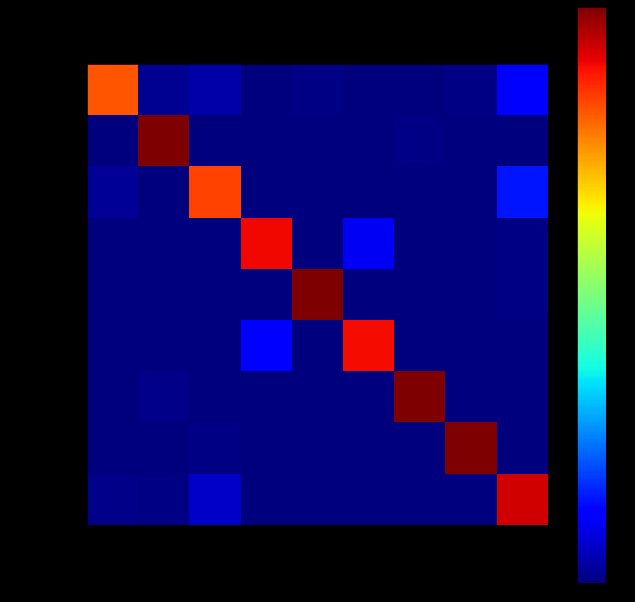


loading the data
houses tagged  17817
roads tagged  4731
asphalts tagged  2292
greentree tagged  9912
dead trees tagged  2969
green grass tagged  12868
dry grass tagged  4992
water tagged  4028
rocks tagged  13889
Running mlp.predict
Running RMSD Analysis
Making the cut on RMSD
Creating the Confusion Matrix


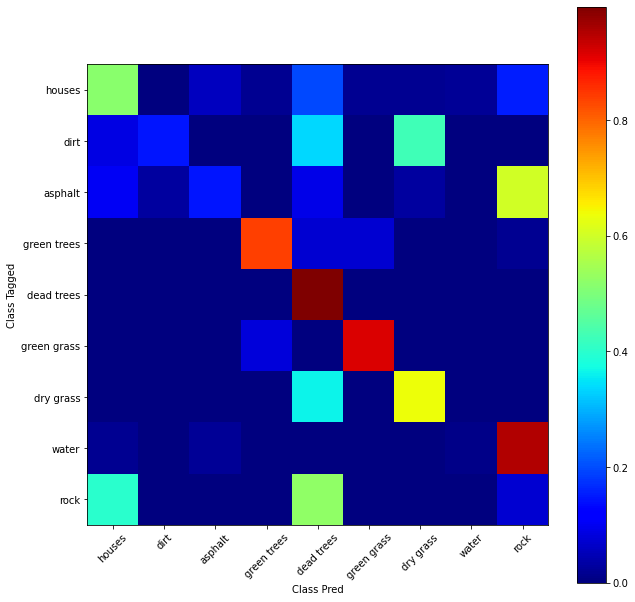

House Accuracy : 0.514452489195712
Dirt Accuracy : 0.14669203128302685
Asphalt Accuracy : 0.14528795811518325
GreenTree Accuracy : 0.8375706214689266
DeadTree Accuracy : 0.9966318625799933
GreenGrass Accuracy : 0.9179359651849549
DryGrass Accuracy : 0.6372195512820513
Water Accuracy : 0.008192651439920555
Rock Accuracy : 0.07235942112463101
Overall Accuracy 0.5100138779286512
Unburnable Accuracy 0.6326917229927264
Burnable Accuracy 0.9942096873881786
Saving as tif raster file
this took  620.5891795158386 seconds


In [6]:
################### Prediction Only Cell #########################################################
################### This block  predict the classes for the entire map (mlp.predict) (WITHOUT Training)
################### Then Run the RMSD Analysis to differentiate Green Trees vs Grass #############################
start = time.time()

#define your input and output files
imageFile2='../AerialImages/hxip_m_3711955_nw_11_100.tif'
tagFile2='hxip_m_3711955_nw_11_100_agfeb11.tif'
outFile2="hxip_m_3711955_nw_11_100_NNRMSD.tif"


print("loading the data")
tmp, tmp, tmp, tmp, X_matrix2, X_flat2, Y_matrix2, Y_flat2  = LoadTrainingData( imageFile2,tagFile2)


print("Running mlp.predict")
Y_predict2 = mlp.predict(X_flat2)


print("Running RMSD Analysis")
Y_predict_matrix2 = np.reshape(Y_predict2, X_matrix2[0].shape)
NIR_RMS2 = RMSD_of_band5x5(X_matrix2[3], Y_predict_matrix2)

NIR_RMS_f2 = NIR_RMS2.flatten()

print("Making the cut on RMSD")
for i in range(len(NIR_RMS_f2)):
    if ( NIR_RMS_f2[i]<RMSD_CUT and Y_predict2[i]==4 ):
        Y_predict2[i]=6

############ Confusion Matrix Test###########
print("Creating the Confusion Matrix")
cm = metrics.confusion_matrix(Y_flat2[Y_flat2!=0],Y_predict2[Y_flat2!=0])

cm_norm = []
for i in range(len(cm)):
    row = cm[i]/np.sum(cm[i])
    cm_norm.append(row)
cm_norm= np.array(cm_norm)    

fulltargets =['houses', 'dirt', 'asphalt', 'green trees', 'dead trees', 'green grass','dry grass', 'water','rock']

fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.imshow(cm_norm,cmap='jet',extent=[0.5,9.5,0.5,9.5])
plt.colorbar()

plt.xlabel("Class Pred")
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(fulltargets)
plt.xticks(rotation = 45)
plt.ylabel("Class Tagged")
ax.set_yticks([1,2,3,4,5,6,7,8,9])
ax.set_yticklabels(fulltargets[::-1])
plt.show()
############ End Confusion Matrix Test###########

PrintAcc(Y_predict2,Y_flat2)
SavePredictTif(Y_predict2,imageFile2,outFile2)
print('this took ', time.time()-start, 'seconds')

In [ ]:
########## Probabilities Analysis from mlp.predict_proba()
### This code block makes the probability histogram using the training data.
targets = ['houses', 'road', 'asphalt', 'green trees', 'dead trees', 'dry grass', 'water','rock']
fulltargets =['houses', 'road', 'asphalt', 'green trees', 'dead trees', 'green grass','dry grass', 'water','rock']

prob = mlp.predict_proba(X_train)

prob_1 = prob[Y_train==1]
prob_2 = prob[Y_train==2]
prob_3 = prob[Y_train==3]
prob_4 = prob[Y_train==4]
prob_5 = prob[Y_train==5]
prob_7 = prob[Y_train==7]
prob_8 = prob[Y_train==8]
prob_9 = prob[Y_train==9]

probabilities = [prob_1, prob_2, prob_3,prob_4,prob_5,prob_7,prob_8,prob_9]

print(len(probabilities))

def probability_graph(prob_matrix, class_num,ax):
    bins = np.linspace(0,1,10)
    matrix = np.zeros((len(bins)-1,8))

    for j in range(8):
        hist,edges =np.histogram(prob_matrix[:,j],bins=bins)
        matrix[:,j]=np.flip(hist)
    ax.imshow(matrix,extent=[0.5,8.5,0,100], aspect='auto', cmap="jet", norm=colors.LogNorm())
    ax.set_xticks([1,2,3,4,5,6,7,8])
    ax.set_xticklabels(targets)
    ax.set_title("Probability of Tagged {}:{} Log scale".format(class_num,fulltargets[class_num-1]))

fig , axes = plt.subplots(4,2,figsize=(20,20))
ax = axes.ravel()
classnumber = [1,2,3,4,5,7,8,9]
for i in range(8):
    probability_graph(probabilities[i],classnumber[i] , ax[i]) 